<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Data_Pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The project is hosted on GitHub. Get a copy by running:

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


# Pre

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns

!pip install pyunpack
!pip install patool
from pyunpack import Archive

import warnings
warnings.filterwarnings('ignore')


plt.rcParams.update({'font.size': 20, 'figure.figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.9 MB/s 


> * **Save file function**

In [3]:
def savefile(df,name):
  t = df
  t.to_csv(name, header=True, index=True)
  return 0

---
# Data Preprocessing


## **SMC**

In [4]:
from astropy.io import fits

a = fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_451_3504_table2.dat.fits')
a[1].columns['---'].name = 'new_name1'
a[1].columns['---'].name = 'new_name2'
a[1].columns['---'].name = 'new_name3'
a[1].columns['---'].name = 'new_name4'
a[1].columns['---'].name = 'new_name5'
a[1].columns['---'].name = 'new_name6'

smc = pd.DataFrame(a[1].data)
smc['Class'].value_counts()

C-AGB                    39
STAR: dusty OB star      23
YSO-3                    22
RSG                      22
C-PN                     20
YSO-1                    14
O-AGB                    11
WR                       10
YSO-4                    10
O-EAGB                    8
YSO-2                     5
O-PN                      4
STAR                      4
RCrB                      3
C-PAGB                    3
HII                       3
OTHER: B[e] star          2
OTHER: FG O-EAGB          2
OTHER: S Star             1
O-PAGB                    1
OTHER: symbiotic star     1
BSG                       1
Name: Class, dtype: int64

In [5]:
a1 = smc.loc[smc['Class']=='O-AGB                ']
a2 = smc.loc[smc['Class']=='C-AGB                ']
a3 = smc.loc[smc['Class']=='YSO-1                ']
a4 = smc.loc[smc['Class']=='YSO-2                ']
a5 = smc.loc[smc['Class']=='YSO-3                ']
a6 = smc.loc[smc['Class']=='YSO-4                ']
a7 = smc.loc[smc['Class']=='RSG                  ']
a8 = smc.loc[smc['Class']=='O-EAGB               ']
a9 = smc.loc[smc['Class']=='O-PAGB               ']
b1 = smc.loc[smc['Class']=='C-PAGB               ']

a = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,b1])
a = a.reset_index(drop=True)
a['Class'].value_counts()

a['Class'] = a['Class'].replace({'YSO-1                ':'YSO','O-EAGB               ':'OAGB',
                                 'YSO-2                ':'YSO','O-AGB                ':'OAGB',
                                 'YSO-3                ':'YSO','RSG                  ':'RSG',
                                 'YSO-4                ':'YSO','C-AGB                ':'CAGB',
                                 'O-PAGB               ':'PAGB','C-PAGB               ':'PAGB'})
SMC = a
SMC['Class'].value_counts()

YSO     51
CAGB    39
RSG     22
OAGB    19
PAGB     4
Name: Class, dtype: int64

In [6]:
x_SMC = SMC[['UMmag','BMmag','VMmag','IMmag','<Vmag>','<Imag>','Iamp','P2','J2mag',
         'H2mag','Ks2mag','JImag','HImag','KImag','IRAC1','IRAC2','IRAC3','IRAC4',
         '[24]','[70]','[160]','Tmcd']]
y_SMC = SMC['Class']

x_SMC = x_SMC.rename(columns={'UMmag':'Umag','BMmag':'Bmag','VMmag':'Vmag','IMmag':'Imag','Iamp':'IAmp',
                           'P2':'Per','JImag':'Jmag','HImag':'Hmag','KImag':'Ksmag','IRAC1':'[3.6]',
                           'IRAC2':'[4.5]','IRAC3':'[5.8]','IRAC4':'[8.0]','Tmcd':'TeffMcD'})

print(x_SMC.shape)

(135, 22)


----
## **LMC**

In [7]:
from astropy.io import fits
import pandas as pd
with fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_470_3250_table2.dat.fits') as data:
    lmc = pd.DataFrame(data[1].data)

lmc['SpClass'].value_counts()

     HII    155
    CAGB    152
    OAGB     89
    YSO3     81
     RSG     72
    YSO1     56
HII/YSO3     37
    STAR     31
     OPN     28
    YSO4     23
   CPAGB     19
    YSO2     16
     LBV     15
   OPAGB     14
     CPN     14
      WR     11
   RVTau     10
    B[e]      9
     GAL      8
     SNR      7
    RCrB      6
     UNK      5
     BSG      2
    Nova      1
     YSG      1
Name: SpClass, dtype: int64

In [8]:
a1 = lmc.loc[lmc['SpClass']=='    OAGB']
a2 = lmc.loc[lmc['SpClass']=='    CAGB']
a3 = lmc.loc[lmc['SpClass']=='    YSO1']
a4 = lmc.loc[lmc['SpClass']=='    YSO2']
a5 = lmc.loc[lmc['SpClass']=='    YSO3']
a6 = lmc.loc[lmc['SpClass']=='HII/YSO3']
a7 = lmc.loc[lmc['SpClass']=='    YSO4']
a8 = lmc.loc[lmc['SpClass']=='   CPAGB']
a9 = lmc.loc[lmc['SpClass']=='   OPAGB']
b1 = lmc.loc[lmc['SpClass']=='     RSG']

a = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,b1])
a = a.reset_index(drop=True)
a['SpClass'].value_counts()

a['SpClass'] = a['SpClass'].replace({'    OAGB': 'OAGB','    CAGB': 'CAGB','    YSO1':'YSO',
                                     '    YSO2':'YSO','    YSO3':'YSO','   CPAGB':'PAGB',
                                     '   OPAGB':'PAGB','HII/YSO3':'YSO','    YSO4':'YSO',
                                     '     RSG':'RSG'})
LMC = a
LMC['SpClass'].value_counts()

YSO     213
CAGB    152
OAGB     89
RSG      72
PAGB     33
Name: SpClass, dtype: int64

In [9]:
x_LMC = LMC[['Umag','Bmag','Vmag','Imag','<Vmag>','<Imag>','IAmp','Per','J2mag',
         'H2mag','Ks2mag','Jmag','Hmag','Ksmag','[3.6]','[4.5]','[5.8]','[8.0]',
         '[24]','[70]','[160]','TeffMcD']]
y_LMC = LMC['SpClass']

print(x_LMC.shape)

(559, 22)


## **Final Data**

In [50]:
X = pd.concat([x_LMC,x_SMC])
X = X.reset_index(drop=True)
Y = pd.concat([y_LMC,y_SMC])
Y = Y.reset_index(drop=True)
Y = pd.DataFrame(Y)
Y.columns = ['Class']

In [51]:
X

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD
0,-99.000,18.307,16.468,13.943,16.623,13.985,0.057,100.76,12.408,11.488,...,-99.00,-99.000,10.9099,10.8052,10.6874,10.5041,9.6408,-99.000,-99.000,3156.0
1,13.433,13.584,13.266,12.528,-99.000,-99.000,-99.000,-99.00,12.181,11.781,...,11.66,11.100,10.0871,9.6048,9.2248,8.5769,7.2094,-99.000,-99.000,5555.0
2,-99.000,21.311,19.536,17.339,18.959,16.259,1.228,883.70,15.052,13.779,...,12.79,12.180,11.1326,10.6102,10.0316,9.2020,7.2266,-99.000,-99.000,2673.0
3,19.691,18.868,16.725,13.571,-99.000,-99.000,-99.000,-99.00,12.263,11.307,...,11.34,11.010,10.7319,10.7726,10.5911,10.5096,-99.0000,-99.000,-99.000,3145.0
4,17.707,16.211,14.628,13.123,-99.000,-99.000,-99.000,-99.00,12.416,11.740,...,11.53,11.210,10.5316,10.4196,10.0697,9.4969,7.1893,-99.000,-99.000,3644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,19.243,17.556,15.127,12.562,15.066,12.513,0.327,383.00,10.864,10.023,...,10.08,99.999,9.4930,9.5620,9.4160,9.3020,9.0010,99.999,99.999,2825.0
690,13.820,13.929,13.999,13.620,99.999,99.999,99.999,0.00,13.067,12.591,...,12.60,11.800,9.9690,9.2040,8.5990,7.5370,5.2790,99.999,99.999,0.0
691,99.999,99.999,99.999,99.999,99.999,99.999,99.999,0.00,17.340,15.458,...,15.80,13.950,10.5710,9.4770,8.5140,7.5210,5.0410,99.999,99.999,0.0
692,15.435,15.816,15.439,15.093,99.999,99.999,99.999,0.00,14.726,14.649,...,14.60,14.410,13.5580,12.9380,10.6140,8.1270,4.9120,99.999,99.999,0.0


(array([108.,   0., 191.,   0.,   0., 264.,   0.,  37.,   0.,  94.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

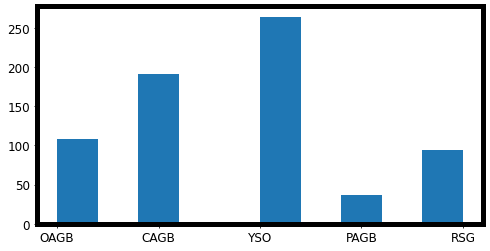

In [52]:
plt.hist(Y['Class'])

In [53]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
EY = LE.fit_transform(Y)
EY = pd.DataFrame(EY)
EY.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [54]:
X.replace([np.inf, -np.inf, -99, 99.999 , 0.00 ], np.nan, inplace=True)

In [55]:
nan_data_point = np.count_nonzero(np.isnan(X))
all_data_point = X.shape[0]*X.shape[1]
missing_fraction = np.count_nonzero(np.isnan(X))/(X.shape[0]*X.shape[1])

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

There are 15268 data points in this data
There are 6179 missing data in this data
The fraction of missing data in all data is 0.4047026460571129


So it is shocking that we have 6179 misisng data in this data.
we should find some ways to adapt it.

The first suggestion is finding and removing some columns which have incredible nan data

In [56]:
for i in X.columns:
  print(f'The column named as {i} has {np.count_nonzero(np.isnan(X[i]))} missing data')

The column named as Umag has 381 missing data
The column named as Bmag has 285 missing data
The column named as Vmag has 285 missing data
The column named as Imag has 356 missing data
The column named as <Vmag> has 550 missing data
The column named as <Imag> has 512 missing data
The column named as IAmp has 515 missing data
The column named as Per has 512 missing data
The column named as J2mag has 146 missing data
The column named as H2mag has 99 missing data
The column named as Ks2mag has 75 missing data
The column named as Jmag has 159 missing data
The column named as Hmag has 164 missing data
The column named as Ksmag has 215 missing data
The column named as [3.6] has 89 missing data
The column named as [4.5] has 52 missing data
The column named as [5.8] has 42 missing data
The column named as [8.0] has 73 missing data
The column named as [24] has 40 missing data
The column named as [70] has 506 missing data
The column named as [160] has 617 missing data
The column named as TeffMcD 

We find out 7 columns have more than 500 nan value. So we delet this columns and continue with others.

In [57]:
more_than_500_nan = []
for i in X.columns:
  if np.count_nonzero(np.isnan(X[i])) > 500 :
    more_than_500_nan.append(i)

print(more_than_500_nan)

['<Vmag>', '<Imag>', 'IAmp', 'Per', '[70]', '[160]', 'TeffMcD']


In [58]:
X.drop(more_than_500_nan, inplace=True, axis=1)

Now we calculate previous information again

In [59]:
nan_data_point = np.count_nonzero(np.isnan(X))
all_data_point = X.shape[0]*X.shape[1]
missing_fraction = np.count_nonzero(np.isnan(X))/(X.shape[0]*X.shape[1])

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

There are 10410 data points in this data
There are 2461 missing data in this data
The fraction of missing data in all data is 0.23640730067243035


In the next step we should find the number of missing values in for each stars.

In [86]:
list_row_nan = []
list_Class = []
list_row_nan_5 = []
list_Class_5 = []
for i in range(0,len(X)):
  list_row_nan.append(np.count_nonzero(np.isnan(X.iloc[i])))
  list_Class.append(Y.iloc[i][0])
  if np.count_nonzero(np.isnan(X.iloc[i])) > 6 :    
    list_row_nan_5.append(np.count_nonzero(np.isnan(X.iloc[i])))
    list_Class_5.append(Y.iloc[i][0])


(array([62., 26., 19.,  0., 16.,  3.,  0.,  1.,  2.,  2.]),
 array([ 7. ,  7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. ]),
 <a list of 10 Patch objects>)

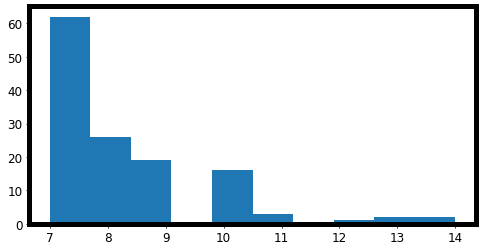

In [79]:
plt.hist(list_row_nan_5)

In [87]:
sum(list_row_nan_5)

1072

In [88]:
len(list_row_nan_5)

131

(array([[ 10.,   0.,  39.,   0.,   0.,  66.,   0.,  16.,   0.,   0.],
        [108.,   0., 191.,   0.,   0., 264.,   0.,  94.,   0.,  37.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 Lists of Patches objects>)

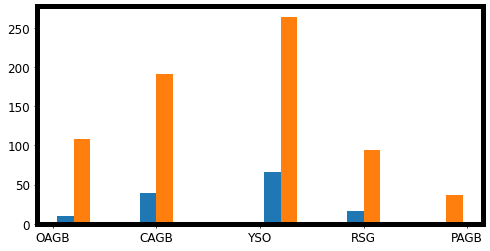

In [91]:
plt.hist([list_Class_5,Y['Class']])

## Data Pre

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X.replace([np.inf, -np.inf, -99, 99.999], np.nan, inplace=True)
imp = IterativeImputer()
imp_data = imp.fit_transform(X)
X = pd.DataFrame(imp_data, columns= X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , EY , test_size=0.1 , random_state = 1234 )

In [ ]:
Data = pd.concat([X,Y,EY], axis=1)

from sklearn.utils import shuffle
Data = shuffle(Data, random_state=42)
Data = Data.reset_index(drop=True)

Data.head()

In [ ]:
Data['Class'].value_counts()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

r_scaler = RobustScaler()
X_rbst = r_scaler.fit_transform(X)
X_rbst = pd.DataFrame(X_rbst, columns= X.columns)

s_scaler = StandardScaler()
X_std = s_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns= X.columns)

mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns= X.columns)

In [ ]:
from sklearn.decomposition import PCA

t = X
pca = PCA()
t = pca.fit_transform(t)
PX = pd.DataFrame(t)   

t = X_rbst
rpca = PCA()
t = rpca.fit_transform(t)
PRX = pd.DataFrame(t) 

t = X_mm
mpca = PCA()
t = mpca.fit_transform(t)
PMX = pd.DataFrame(t)   

t = X_std
spca = PCA()
t = spca.fit_transform(t)
PSX = pd.DataFrame(t)